1) 
When I prompeted chatGPT with a question on this distinction, part of its response was: 

"Key Differences:
Standard deviation reflects the spread of individual data points.
Standard error of the mean reflects the precision of the sample mean as an estimate of the population mean."

This explains the distinction pretty clearly. As far as I understand it, it shows that standard deviation and standard error of the mean are similar concepts, but standard deviation shows the distribution of data points within a specific sample, whereas the standard error of mean reflects the relationship between the sample as a whole and the population that it's sampled from.

2) You could do this by finding a section of the mean distribution curve at some distance from the center that includes 95% of the area under the curve. The standard deviation of the means can be used to find this distance, because in a normal distribution, the area under a curve at set standard deviations from the center are known constants.

3) If you wanted to find the 95% confidence interval using numpy's quantile, you'd want to use it to find the the value of the 2.5%th quantile, and the 97.5%th quantile, so that you can exclude the bottom 2.5% and the top 2.5% of values, leaving you with the continuous 95% interval.

4) I used a data set that counted the number of objects that humanity launched into space by year. This data set is a good candidate for bootstrapping, because although it shows a clear trend, the number of data points is limited and there is no way for us to add more of them. The number of objects launched year by year grows quickly, but we only started launching objects into space relatively recently, so there are many years with 0-5 launches, yet in recent years we're launching thousands of objects.

Initially, the data intervals on the x axis were so thin that it wasn't being rendered correctly, so I decided that it would be sensible to bin them for the chart of the initial data set.

Then, I asked it to bootstrap the data set, and generate a second graph of the distribution of bootstrapped medians

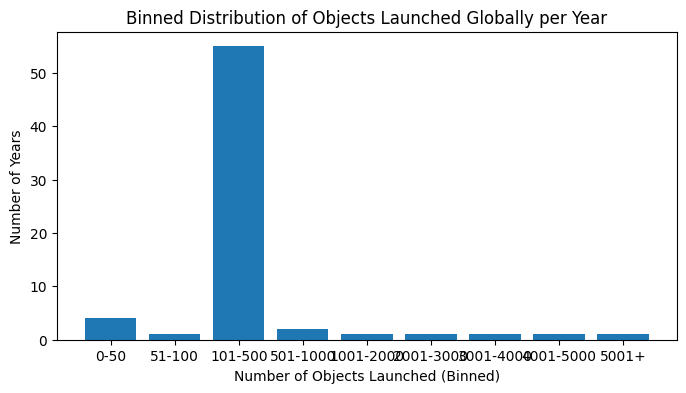

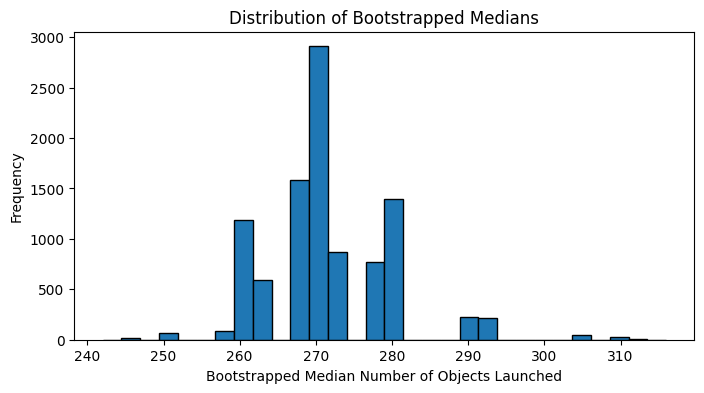

(np.float64(260.0), np.float64(292.0))


In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load the dataset from the URL
url = 'https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2024/2024-04-23/outer_space_objects.csv'
data = pd.read_csv(url)

# Check for missing values in the 'Year' or 'num_objects' column
data = data.dropna(subset=['Year', 'num_objects'])

# Group by the 'Year' column and sum the 'num_objects' to get the number of objects launched globally in each year
objects_per_year = data.groupby('Year')['num_objects'].sum().reset_index()

# Create a complete range of years from the minimum to the maximum year in the dataset
all_years = pd.DataFrame({'Year': range(data['Year'].min(), data['Year'].max() + 1)})

# Merge the data with all years, filling missing values with 0
objects_per_year = pd.merge(all_years, objects_per_year, on='Year', how='left').fillna(0)

# Create bins for ranges of objects launched (e.g., 0-50, 51-100, etc.)
bins = [0, 50, 100, 500, 1000, 2000, 3000, 4000, 5000, 6000]
labels = ['0-50', '51-100', '101-500', '501-1000', '1001-2000', '2001-3000', '3001-4000', '4001-5000', '5001+']
objects_per_year['binned'] = pd.cut(objects_per_year['num_objects'], bins=bins, labels=labels, right=False)

# Create the histogram data: count the number of years that fall into each bin
histogram_data_binned = objects_per_year['binned'].value_counts().sort_index()

# Plot the histogram for the binned data with smaller size
plt.figure(figsize=(8,4))  # Adjusted size
plt.bar(histogram_data_binned.index, histogram_data_binned.values)
plt.xlabel('Number of Objects Launched (Binned)')
plt.ylabel('Number of Years')
plt.title('Binned Distribution of Objects Launched Globally per Year')
plt.show()

# Bootstrapping setup
n_iterations = 10000  # Number of bootstrap samples
bootstrap_medians = []

# Perform bootstrap sampling
for i in range(n_iterations):
    bootstrap_sample = objects_per_year['num_objects'].sample(frac=1, replace=True)
    median_value = bootstrap_sample.median()
    bootstrap_medians.append(median_value)

# Plot the distribution of bootstrapped medians
# Replot both histograms with smaller sizes

# Calculate the 95% confidence interval for the median
lower_bound = np.percentile(bootstrap_medians, 2.5)
upper_bound = np.percentile(bootstrap_medians, 97.5)

# Print the 95% confidence interval
confidence_interval = (lower_bound, upper_bound)

# Plot the histogram for bootstrapped medians with smaller size
plt.figure(figsize=(8,4))  # Adjusted size
plt.hist(bootstrap_medians, bins=30, edgecolor='black')
plt.xlabel('Bootstrapped Median Number of Objects Launched')
plt.ylabel('Frequency')
plt.title('Distribution of Bootstrapped Medians')
plt.show()

print(confidence_interval)

To graph a distribution of bootstrapped values other than the median, you can simply change this part of the code:

bootstrap_medians = []

# Perform bootstrap sampling
for i in range(n_iterations):
    bootstrap_sample = objects_per_year['num_objects'].sample(frac=1, replace=True)
    median_value = bootstrap_sample.median()
    bootstrap_medians.append(median_value)


to make a list of values like the "bootstrap_medians = []", but for standard deviations for example, and then append then inside the for loop, append the standard deviation of each individual bootstrapped data set instead of the median.

5) If a data set consists of a sample that is a subset of the population, we can't use it to compute an exact population parameter like the population mean or median. We can instead calculate a sample statistic that we can use as an estimate of the population parameter. This estimate may or may not be accurate, depending on how representative the sample is of the population. 

The confindece interval lets us gauge whether the sample statistic is a reasonable estimate of the population parameter, however; since the bootstrapped data is itself based on the sample, it may not always be reliable.

6) 
    1) Bootstrapping is a process that involves producing a multitude of data sets by picking data points with replacement from a sample data set, and then collecting a statistic from these data sets like the mean of median.
    2) The main purpose of boostrapping is to estimate a distribution of a statistic of a sample, like the mean or median without having to actually collect new samples. This may be useful for trying to figure out how representative your data sample is of the overall population.
    3) By bootstrapping the sample and recording the distribution of the averages (mean?), you could see where your hypothesized guess lies on this distribution, and calculate the confidence with which it could be true.

**ChatGPT chat summary and link:**
